In [1]:
import gudhi as gd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pickle


from pygenstability import run, constructors, plotting
from pygenstability.contrib.optimal_scales import *

In [2]:
import sys
from pathlib import Path

module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from msfiltration import MSF
from msfiltration.msf_bootstrapping import plot_pds, select_scales_pds

In [3]:
module_path = str(Path.cwd().parents[2])+  "/Software/AdGS"
if module_path not in sys.path:
    sys.path.append(module_path)

from adgs.utils import remove_self_loops

In [47]:
root_fig = '/home/tc/OneDrive/Software/MSFiltration/figures/'

# Import mobility baseline network

In [5]:
# Load data
root = '/home/tc/OneDrive/Software/AdGS/mobility/data/raw/mobility_data.pkl'

with open(root, 'rb') as handle:
    data = pickle.load(handle)

baseline_adjacency = data['baseline_adjacency']
pos = data['pos']
node_pop = data['node_pop']

In [6]:
graph = nx.from_numpy_array(remove_self_loops(baseline_adjacency.copy()), create_using=nx.DiGraph)

In [55]:
baseline_adjacency.shape

(3125, 3125)

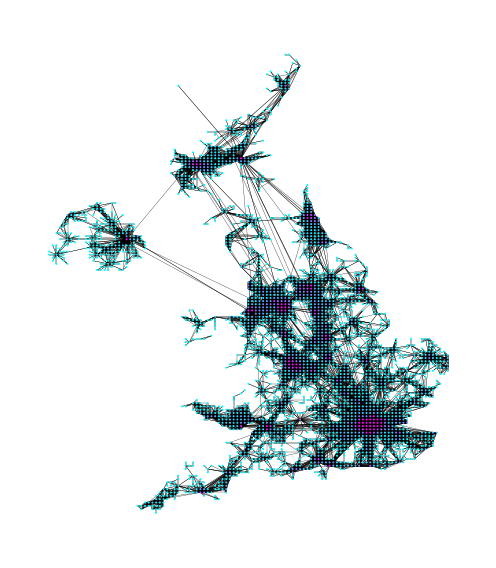

In [7]:
fig_x = 7
fig_y = 8
node_size = 1
width = 0.3

# Draw baseline network with population
fig, ax = plt.subplots(1,figsize =(fig_x,fig_y))
nx.draw(graph, ax=ax,pos=pos,node_size=node_size, width = width, arrows = False,
       node_color=node_pop, cmap = 'cool', vmax = np.percentile(node_pop,99) )
fig.tight_layout()
plt.show()

# MS analysis on baseline network


In [8]:
root_MS_mobility = '/home/tc/OneDrive/Software/Mobility Data Code/Results/GBR/Markov Stability/Run15/Run15_results.pkl'

# Load data (deserialize)
with open(root_MS_mobility, 'rb') as handle:
    all_results = pickle.load(handle)

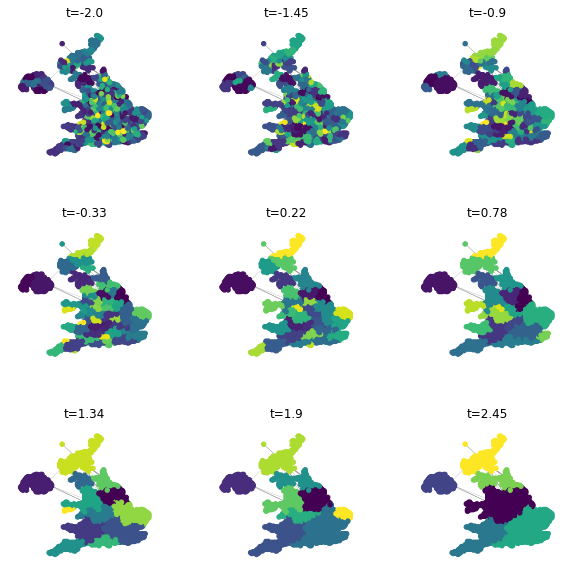

In [9]:
# Get times
times = all_results['times']
log_times = np.log10(all_results['times'])

# Get information about communities
community_id = all_results['community_id']
n_communities  = all_results['number_of_communities']

fig, axes = plt.subplots(3, 3, figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, ax in enumerate(axes.flat):
    
    time = int(i*len(times)/9)
    
    nx.draw(graph, ax=ax,pos=pos, node_size = 20, arrows=False, width = 0.1,
            node_color = community_id[time])
    ax.set(title=r't={}'.format(np.around(np.log10(times[time]),2)))
plt.show()

[-1.68227425 -0.82943144 -0.44481605  1.3277592   1.41137124  2.61538462]


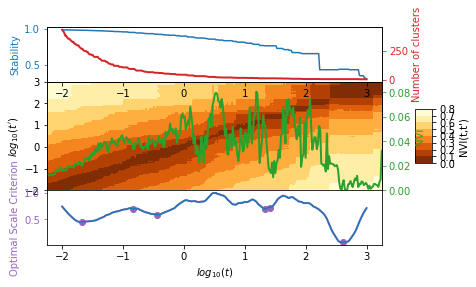

In [10]:
# select optimal scales
identify_optimal_scales(all_results,criterion_threshold=0,window_size=20)
selected_scales = log_times[all_results['selected_partitions']]
print(selected_scales)
plotting.plot_scan(all_results)
# plt.savefig(root_fig +'MS_Scan.pdf',bbox_inches='tight')

In [19]:
optimal_scales_nvi = [31, 90, 136, 171, 202, 273]

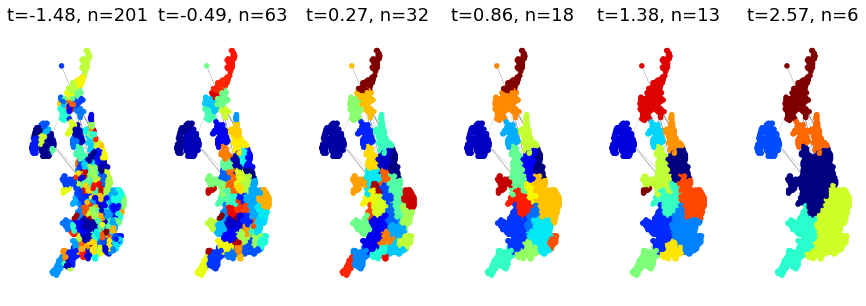

In [21]:
fig, axes = plt.subplots(1, len(optimal_scales_nvi), figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, ax in enumerate(axes.flat):
    
    time = optimal_scales_nvi[i]
    
    nx.draw(graph, ax=ax,pos=pos, node_size = 20, arrows=False, width = 0.1,
            node_color = community_id[time],cmap = 'jet')
    ax.set(title=r't={}, n={}'.format(np.around(np.log10(times[time]),2), n_communities[time]))


# Bootstrapping MSF

In [11]:
# construct MSF object for mobility network
msf = MSF()
msf.log_times = log_times
# transform communities to arrays
msf.community_ids = [np.asarray(community_id[i]) for i in range(len(community_id))]

In [12]:
n_nodes = len(msf.community_ids[0])
seed = 0
max_dim = 3

In [39]:
# number of bootstraps
B = 20
# number of samples for each bootstrap
n_sample = 300

In [40]:
# define array of nodes
nodes = np.arange(n_nodes)

# initialise random number generator
rng = np.random.RandomState(seed)

# store persistences for different samples
persistences = []

for _ in range(B):

    print("Bootstrapping sample {} of {} ...".format(_+1,B))

    # sample nodes
    nodes_sample = rng.choice(nodes,n_sample)
    nodes_sample.sort()

    # obtain all community assignments for sampled nodes
    community_ids_sampled = []
    for partition in msf.community_ids:
        community_ids_sampled.append(partition[nodes_sample])

    # initialise new MSF object for sample
    msf_sample = MSF()
    msf_sample.community_ids = community_ids_sampled
    msf_sample.log_times = msf.log_times

    # compute PD for sample
    msf_sample.build_filtration()
    msf_sample.compute_persistence()

    # add persistence of different dimensions to list
    persistences.append(
        [msf_sample.filtration.persistence_intervals_in_dimension(dim) for dim in range(max_dim)]
    )

Bootstrapping sample 1 of 20 ...
Building filtration ...


100%|██████████| 300/300 [00:26<00:00, 11.39it/s] 


Computing persistence ... 
Bootstrapping sample 2 of 20 ...
Building filtration ...


100%|██████████| 300/300 [00:31<00:00,  9.59it/s] 


Computing persistence ... 
Bootstrapping sample 3 of 20 ...
Building filtration ...


100%|██████████| 300/300 [00:28<00:00, 10.41it/s] 


Computing persistence ... 
Bootstrapping sample 4 of 20 ...
Building filtration ...


100%|██████████| 300/300 [00:40<00:00,  7.46it/s] 


Computing persistence ... 
Bootstrapping sample 5 of 20 ...
Building filtration ...


100%|██████████| 300/300 [00:29<00:00, 10.27it/s] 


Computing persistence ... 
Bootstrapping sample 6 of 20 ...
Building filtration ...


100%|██████████| 300/300 [00:25<00:00, 11.59it/s] 


Computing persistence ... 
Bootstrapping sample 7 of 20 ...
Building filtration ...


100%|██████████| 300/300 [00:49<00:00,  6.11it/s] 


Computing persistence ... 
Bootstrapping sample 8 of 20 ...
Building filtration ...


100%|██████████| 300/300 [01:14<00:00,  4.01it/s] 


Computing persistence ... 
Bootstrapping sample 9 of 20 ...
Building filtration ...


100%|██████████| 300/300 [00:21<00:00, 13.75it/s] 


Computing persistence ... 
Bootstrapping sample 10 of 20 ...
Building filtration ...


100%|██████████| 300/300 [00:13<00:00, 22.25it/s] 


Computing persistence ... 
Bootstrapping sample 11 of 20 ...
Building filtration ...


100%|██████████| 300/300 [00:13<00:00, 22.67it/s] 


Computing persistence ... 
Bootstrapping sample 12 of 20 ...
Building filtration ...


100%|██████████| 300/300 [00:16<00:00, 18.35it/s] 


Computing persistence ... 
Bootstrapping sample 13 of 20 ...
Building filtration ...


100%|██████████| 300/300 [00:10<00:00, 29.36it/s] 


Computing persistence ... 
Bootstrapping sample 14 of 20 ...
Building filtration ...


100%|██████████| 300/300 [00:15<00:00, 19.14it/s] 


Computing persistence ... 
Bootstrapping sample 15 of 20 ...
Building filtration ...


100%|██████████| 300/300 [00:13<00:00, 22.94it/s] 


Computing persistence ... 
Bootstrapping sample 16 of 20 ...
Building filtration ...


100%|██████████| 300/300 [00:24<00:00, 12.21it/s] 


Computing persistence ... 
Bootstrapping sample 17 of 20 ...
Building filtration ...


100%|██████████| 300/300 [00:20<00:00, 15.00it/s] 


Computing persistence ... 
Bootstrapping sample 18 of 20 ...
Building filtration ...


100%|██████████| 300/300 [00:12<00:00, 23.89it/s] 


Computing persistence ... 
Bootstrapping sample 19 of 20 ...
Building filtration ...


100%|██████████| 300/300 [00:12<00:00, 24.04it/s] 


Computing persistence ... 
Bootstrapping sample 20 of 20 ...
Building filtration ...


100%|██████████| 300/300 [00:21<00:00, 14.03it/s] 


Computing persistence ... 


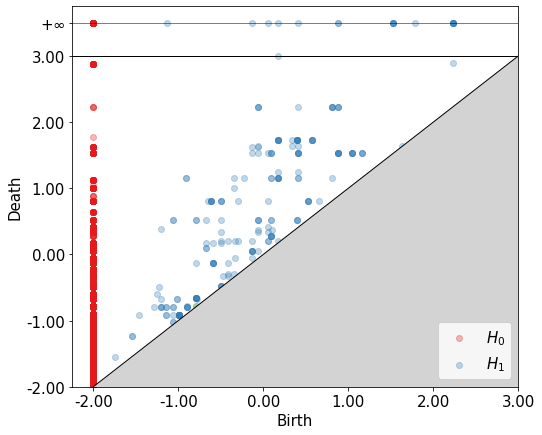

In [41]:
fig, ax = plot_pds(persistences,msf.log_times,alpha=0.3)

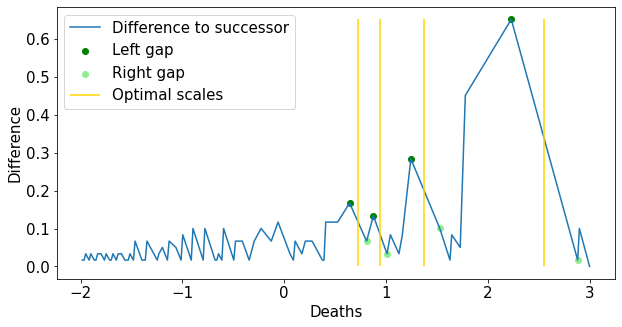

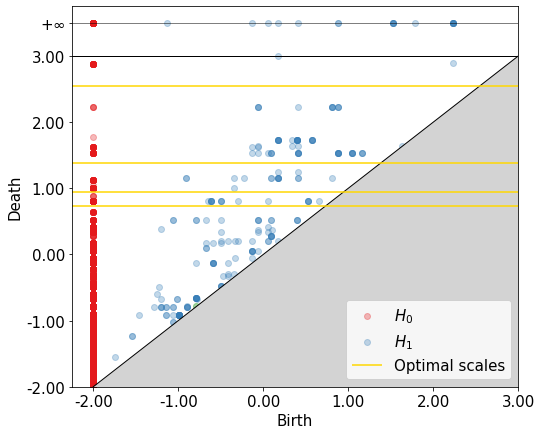

In [51]:
# obtain optimal scales via gaps in PH
optimal_scales_ph, gap_width, ax = select_scales_pds(persistences, msf.log_times, threshold_abs=0.1,min_gap_width=0.12,with_plot=True)

# plot optimal scales in PD
fig, ax = plot_pds(persistences,msf.log_times,optimal_scales_ph,alpha=0.3)
plt.savefig(root_fig +'Mobility_PD_Bootstrap.pdf', dpi=fig.dpi,bbox_inches='tight')

In [58]:
print('Optimal scales NVI: ', optimal_scales_nvi)
print('Optimal scales PH: ', optimal_scales_ph)

Optimal scales NVI:  [31, 90, 136, 171, 202, 273]
Optimal scales PH:  [163 176 202 272]


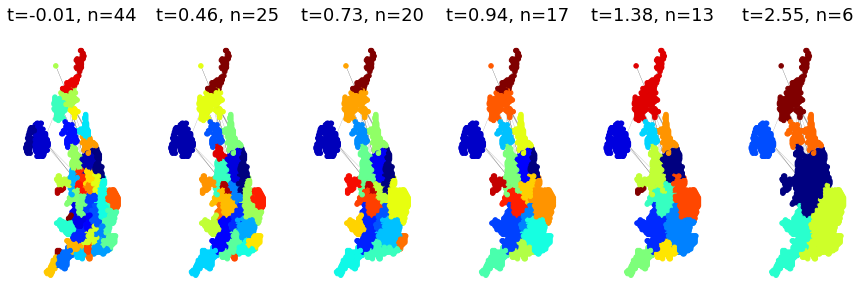

In [45]:
fig, axes = plt.subplots(1, len(optimal_scales_ph), figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, ax in enumerate(axes.flat):
    
    time = optimal_scales_ph[i]
    
    nx.draw(graph, ax=ax,pos=pos, node_size = 20, arrows=False, width = 0.1,
            node_color = community_id[time],cmap = 'jet')
    ax.set(title=r't={}, n={}'.format(np.around(np.log10(times[time]),2), n_communities[time]))
